In [1]:
#!/usr/bin/env python
# coding: utf-8

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


# assign abs. path value 

car_path = r"D:\Z_zDCVS_space\7957_apa_parking_perpend\7957_20220428\pc_sim_7957_38\left_1/"

# for parkingMiddleGoalsDemo
# log_car_file = car_path+"parkingMiddleGoalsDemo.log"
# path_car_file = car_path+"parkingMiddleGoalsDemo_reg.txt"

# for parkingMiddleGoals_original
# log_car_file = car_path+"parkingMiddleGoals_original.log"
# path_car_file = car_path+"parkingMiddleGoals_original_reg.txt"


# for ros_parkingMiddleGoalsDemo
# log_car_file = car_path+"pc_log.txt"
# log_car_file = car_path+"ros_log.txt"
path_car_file = car_path+"computed_path.txt"

# print(log_car_file)
print(path_car_file)

D:\Z_zDCVS_space\7957_apa_parking_perpend\7957_20220428\pc_sim_7957_38\left_1/computed_path.txt


In [3]:
# parse log file:

pose_start_x = []
pose_start_y = []
pose_start_theta = []

pose_goal_x = []
pose_goal_y = []
pose_goal_theta = []

m_lane_width = 0.0
m_iterations = 0.0

forward_mid_x = []
forward_mid_y = []
forward_mid_theta = []

reverse_mid_x = []
reverse_mid_y = []
reverse_mid_theta = []


slot_center_x = []
slot_center_y = []
slot_center_theta = []


slot_center_apa_x = []
slot_center_apa_y = []
slot_center_apa_theta = []


try:

    with (open(log_car_file,"r")) as f:
        print("in log file\n")
        
        
        computePath_start = True
        computePath_goal = True
        right_side = False
        
        
        for line in f:
           
            ##########################################################################################
            ########## for shared parking ParkingMiddleGoals
            
            # 1. get goal pose
            if ("ParkingMiddleGoals: received goal from sharedstate" in line):
                print("1. ParkingMiddleGoals: received goal from sharedstate -- ok")
#                 raw = line.split()
#                 print(raw)
                raw_x = line.split()[8]
                raw_y = line.split()[9]
                raw_theta = line.split()[10]
                pose_goal_x.append(float(raw_x))
                pose_goal_y.append(float(raw_y))
                pose_goal_theta.append(float(raw_theta))

            # 2. left or right side parking
            elif ("right side parking" in line):
                print("2. right side parking -- ok")
                right_side = True
                
            # 3. get m_iterations
            elif ("iteration loop level 1: m_iterations" in line):
#                 print("3. ParkingMiddleGoals: m_flow_util->m_iterations -- ok")
                raw = line.split()
#                 print(raw)
                raw_single_value = line.split()[8]
                m_iterations = raw_single_value                
  
            
            # 4. get m_lane_width
            elif ("ParkingMiddleGoals: m_lane_width" in line):
                print("4. ParkingMiddleGoals: m_lane_widths -- ok")
                raw = line.split()
                print(raw)
                raw_single_value = line.split()[5]
                m_lane_width = raw_single_value

                
            # 10. estimated parking spot center (parking_center = true_goal + offest * angle)
            elif ("ParkingMiddleGoals: convert goal to estimated parking spot center" in line):
                print ("10. ParkingMiddleGoals: convert goal to estimated parking spot center -- ok")
                print(line.split())
                raw_x = line.split()[11]
                raw_y = line.split()[12]
                raw_theta = line.split()[13]
                slot_center_x.append(float(raw_x))
                slot_center_y.append(float(raw_y))
                slot_center_theta.append(float(raw_theta))
            
            
            # 11. parking spot center from APA
            elif ("ParkingMiddleGoals: parking spot center from APA" in line):
                print ("11. ParkingMiddleGoals: parking spot center from APA -- ok")
                print(line.split())
                raw_x = line.split()[11]
                raw_y = line.split()[12]
                raw_theta = line.split()[13]
                slot_center_apa_x.append(float(raw_x))
                slot_center_apa_y.append(float(raw_y))
                slot_center_apa_theta.append(float(raw_theta))                
            
            ##########################################################################################
            ########### for perpendicular parking                
                
            # 2. get start pose
            elif ("getPerpendicularPath: car_pose" in line):
                print("2. getPerpendicularPath: car_pose -- ok")
#                 raw = line.split()
#                 print(raw)
                raw_x = line.split()[5]
                raw_y = line.split()[6]
                raw_theta = line.split()[7]
                pose_start_x.append(float(raw_x))
                pose_start_y.append(float(raw_y))
                pose_start_theta.append(float(raw_theta))
            
                
            # 5. forward mid point
            elif ("getPerpendicularPath: forward mid point" in line):
                print("5. getPerpendicularPath: forward mid point -- ok")
                raw = line.split()
                print(raw)
                raw_x = line.split()[8]
                raw_y = line.split()[9]
                raw_theta = line.split()[10]
                forward_mid_x.append(float(raw_x))
                forward_mid_y.append(float(raw_y))
                forward_mid_theta.append(float(raw_theta))

            
            # 6. reverse mid point
            elif ("getPerpendicularPath: reverse mid point" in line):
                print("6. getPerpendicularPath: reverse mid point -- ok")
                raw = line.split()
                print(raw)
                raw_x = line.split()[8]
                raw_y = line.split()[9]
                raw_theta = line.split()[10]
                reverse_mid_x.append(float(raw_x))
                reverse_mid_y.append(float(raw_y))
                reverse_mid_theta.append(float(raw_theta))

            
            
            ##########################################################################################
            ########### for parallel parking
            
            # 7. get start pose
            elif ("getParallelPath: car_pose" in line):
                print("7. getParallelPath: car_pose -- ok")
#                 raw = line.split()
#                 print(raw)
                raw_x = line.split()[5]
                raw_y = line.split()[6]
                raw_theta = line.split()[7]
                pose_start_x.append(float(raw_x))
                pose_start_y.append(float(raw_y))
                pose_start_theta.append(float(raw_theta))
                
            # 8. forward mid point
            elif ("getParallelPath: forward mid point" in line):
                print("8. getParallelPath: forward mid point -- ok")
                raw = line.split()
#                 print(raw)
                raw_x = line.split()[7]
                raw_y = line.split()[8]
                raw_theta = line.split()[9]
                forward_mid_x.append(float(raw_x))
                forward_mid_y.append(float(raw_y))
                forward_mid_theta.append(float(raw_theta))
                
            # 9. reverse mid point
            elif ("getParallelPath: reverse mid point" in line):
                print("9. getParallelPath: reverse mid point -- ok")
                raw = line.split()
#                 print(raw)
                raw_x = line.split()[7]
                raw_y = line.split()[8]
                raw_theta = line.split()[9]
                reverse_mid_x.append(float(raw_x))
                reverse_mid_y.append(float(raw_y))
                reverse_mid_theta.append(float(raw_theta))


            ##########################################################################################
            ########## for shared parking ComputePath
            
            # 10. ComputePath start pose
            elif ("Start pose: x:" in line):
                if computePath_start:
                    computePath_start = False
                    print("10. Start pose: x: -- ok")
                    print(line.split())
                    raw_x = line.split()[6].split(",")[0]
                    print(raw_x)
                    raw_y = line.split()[8].split(",")[0]
                    print(raw_y)
                    raw_theta = line.split()[10].split(",")[0]
                    print(raw_theta)
                    pose_start_x.append(float(raw_x))
                    pose_start_y.append(float(raw_y))
                    pose_start_theta.append(float(raw_theta))


            # 11. ComputePath goal pose
            elif ("Goal set: x:" in line):
                if computePath_goal:
                    computePath_goal = False
                    print("11. Goal set: x: -- ok")
                    print(line.split())
                    raw_x = line.split()[6].split(",")[0]
                    print(raw_x)
                    raw_y = line.split()[8].split(",")[0]
                    print(raw_y)
                    raw_theta = line.split()[10].split(",")[0]
                    print(raw_theta)
                    pose_goal_x.append(float(raw_x))
                    pose_goal_y.append(float(raw_y))
                    pose_goal_theta.append(float(raw_theta))

           
                

except:
    print("Unexpected error:", sys.exc_info()[0])
#     raise

Unexpected error: <class 'NameError'>


In [4]:
# parse path file: parkingMiddleGoalsDemo_reg.txt

# load computed path files
try:
    path_carx = []
    path_cary = []

    with (open(path_car_file,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx.append(float(line.split()[0]))
                path_cary.append(float(line.split()[1]))
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

pose start [x, y, theta]:	 [] [] []
pose goal [x, y, theta]:	 [] [] []
Unexpected error: <class 'IndexError'>
slot center x, y, theta:	 [] [] []
Unexpected error: <class 'IndexError'>


IndexError: list index out of range

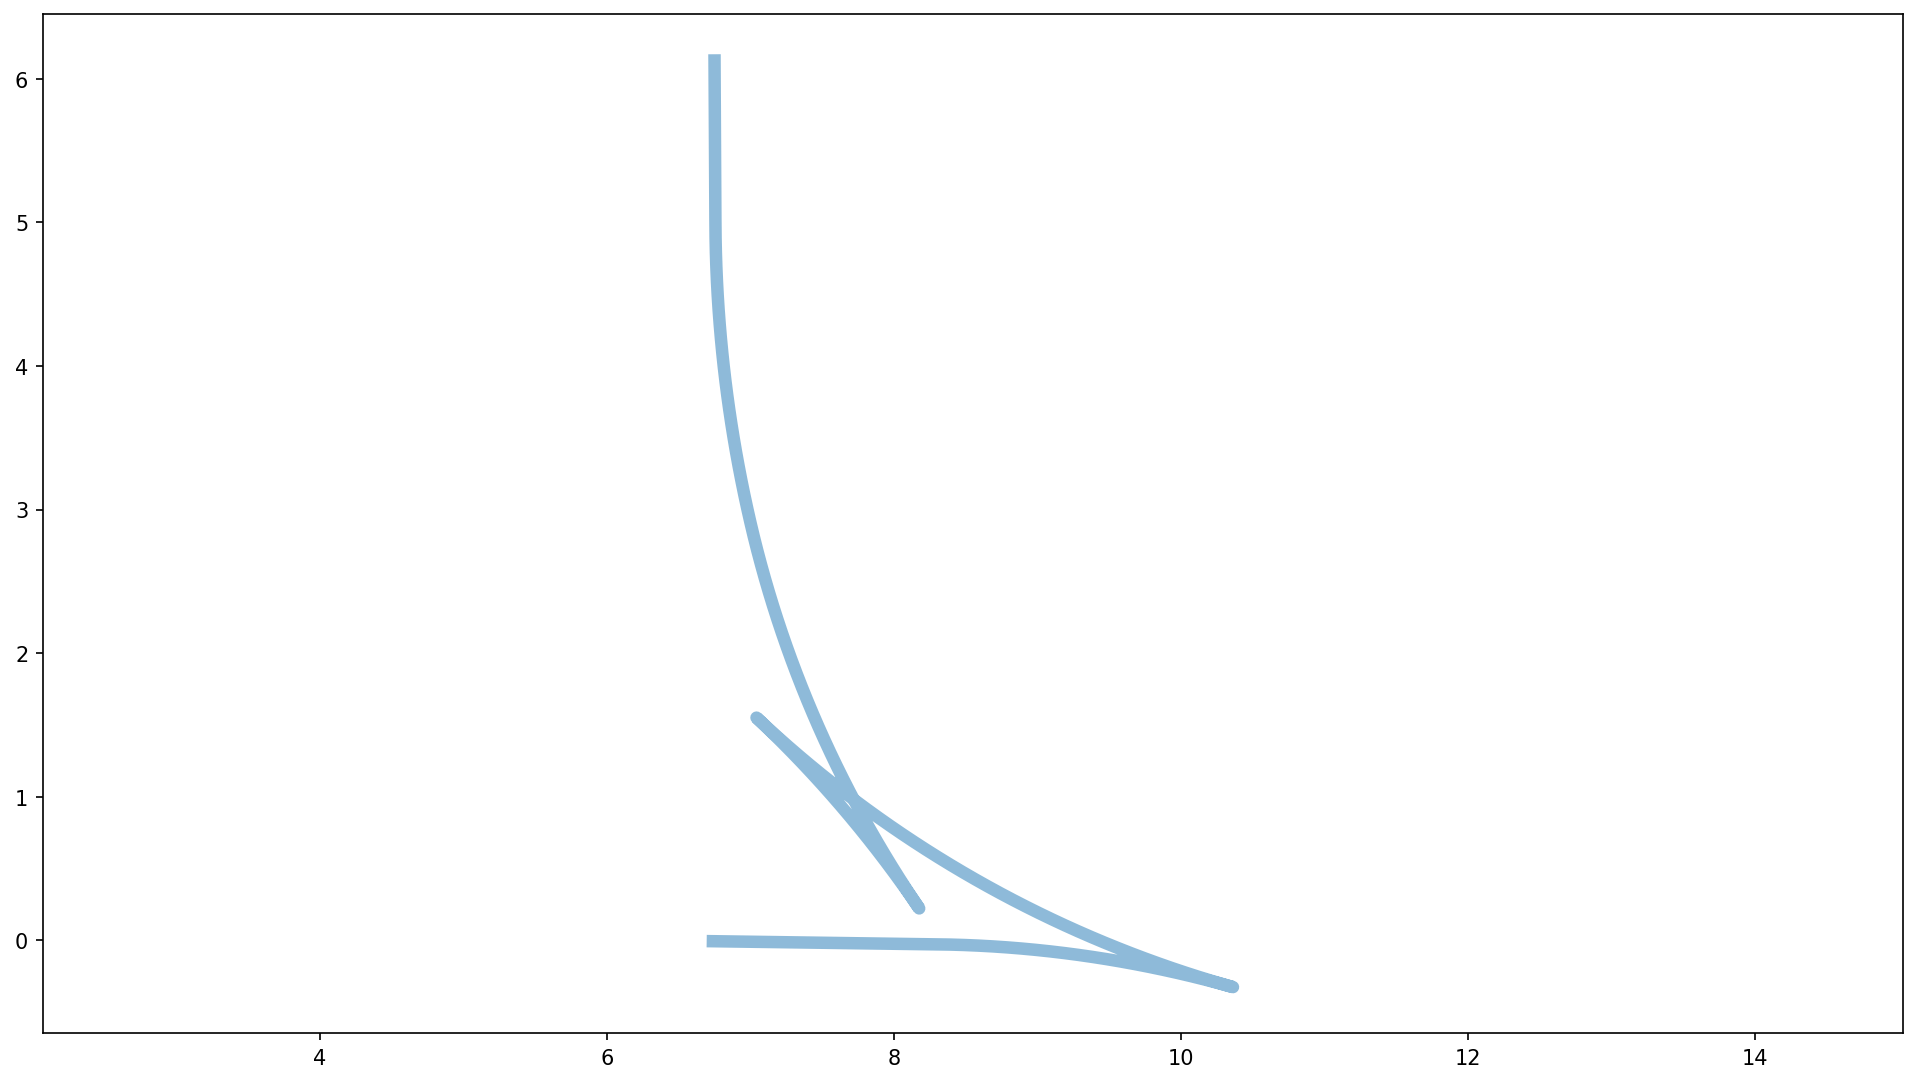

In [7]:
# plot true goal, corrected goal, planned path

plt.figure(figsize=(16,9), dpi=150) # parallel
# plt.figure(figsize=(10,10), dpi=150) # perpendicular

plt.axis("equal")

# 1. plot computed path
plt.plot(path_carx, path_cary, label="car_path1", linewidth=6, alpha=0.5)

# 9: plot shared state goal
# plt.scatter(shared_state_goal_x, shared_state_goal_y, label="shared_state_goal", marker='+', color='r', s=300)
# print("shared goal [x, y, theta]:\t", shared_state_goal_x, shared_state_goal_y, shared_state_goal_theta)

# 7. plot true goal
# plt.scatter(true_goal_x, true_goal_y, label="true_goal", marker='D', color='g', s=200, alpha=0.6)
# print("true goal [x, y, theta]:\t", true_goal_x, true_goal_y, true_goal_theta)

# 8. plot correct goal
# plt.scatter(correct_goal_x, correct_goal_y, label="correct_goal", marker='*', color='m', s=300, alpha=0.6)
# print("correct goal [x, y, theta]:\t", correct_goal_x, correct_goal_y, correct_goal_theta)

# 9. plot odom goal
# plt.scatter(odom_goal_x, odom_goal_y, label="odom_goal", marker='*', color='k', s=150)
# print("odom goal [x, y, theta]:\t", odom_goal_x, odom_goal_y, odom_goal_theta)

# 2. plot start
plt.scatter(pose_start_x, pose_start_y, label="pose_start", marker='*', color='k', s=150)
print("pose start [x, y, theta]:\t", pose_start_x, pose_start_y, pose_start_theta)

# 3. plot goal
try:
    plt.scatter(pose_goal_x, pose_goal_y, label="pose_goal", marker='+', color='r', s=150)
    print("pose goal [x, y, theta]:\t", pose_goal_x, pose_goal_y, pose_goal_theta)
    print("goal to start: dx :\t", pose_goal_x[0] - pose_start_x[0])
    print("goal to start: dy :\t", pose_goal_y[0] - pose_start_y[0])
except:
    print("Unexpected error:", sys.exc_info()[0])

# 4. plot forward mid
# plt.scatter(forward_mid_x, forward_mid_y, label="forward_mid", marker='^', color='g', s=150)

# 5. plot reverse mid
# plt.scatter(reverse_mid_x, reverse_mid_y, label="reverse_mid", marker='v', color='m', s=150)


# 6. plot slot center
plt.scatter(slot_center_x, slot_center_y, label="slot_center", marker='P', color='r', s=150)
print("slot center x, y, theta:\t", slot_center_x, slot_center_y, slot_center_theta)


###############################################################################################
#################### calculate parking slot points using slot_center or slot_center_apa

import numpy as np
from math import sqrt, cos, sin, radians, atan2, degrees

def cc2wc_transform(point_list_cc_x, point_list_cc_y, point_list_wc_x, point_list_wc_y, tr_theta, tr_x, tr_y):
    """ affine transformation matrix
    transform points in cc frame to wc frame using rotation & translation matrix T_R
    """
    point_list_cc = []
    point_list_wc = []
    
    for i in range(len(point_list_cc_x)):
        x = point_list_cc_x[i]
        y = point_list_cc_y[i]
        z = 1
#         print("x cc:\t", x)
#         print("y cc:\t", y)
        tmp_path_point = np.array([
            [x],
            [y],
            [1],
        ])
        point_list_cc.append(tmp_path_point)
    
    T_R = np.array([
        [cos(tr_theta), -sin(tr_theta), tr_x],
        [sin(tr_theta), cos(tr_theta), tr_y],
        [0, 0, 1],
    ])
    
    for i in range(len(point_list_cc_x)):
        tmp_point_wc = T_R.dot(point_list_cc[i])
        point_list_wc.append(tmp_point_wc)
        tmp_x_wc = tmp_point_wc[0][0]
        tmp_y_wc = tmp_point_wc[1][0]
        point_list_wc_x.append(tmp_x_wc)
        point_list_wc_y.append(tmp_y_wc)
    
try:
    slot_point_x_cc = [1.25,     1.25,    -1.25,   -1.25]
    slot_point_y_cc = [-2.275, 2.275, 2.275, -2.275]
    slot_point_x_wc = []
    slot_point_y_wc = []
    tr_x = slot_center_x[0]
    tr_y = slot_center_y[0]
    tr_theta = slot_center_theta[0] - (-1.570796)
    cc2wc_transform(slot_point_x_cc, slot_point_y_cc, 
                    slot_point_x_wc, slot_point_y_wc,
                   tr_theta, tr_x, tr_y)
    print("slot points x:\t", slot_point_x_wc)
    print("slot points y:\t", slot_point_y_wc)
except:
    print("Unexpected error:", sys.exc_info()[0])

# 7. plot parking slot
plt.plot(slot_point_x_wc, slot_point_y_wc)
# plt.plot(slot_point_x_cc, slot_point_y_cc)


    
###############################################################################################
#################### some auxiliary graph


# 8. plot circle
# circle_1 = plt.Circle((slot_point_x_wc[0], slot_point_y_wc[0]), 1.1, fill=False)
# plt.gca().add_patch(circle_1)

# 9. draw line from goal to start
# plt.plot((pose_start_x[0], pose_goal_x[0]), (pose_start_y[0], pose_goal_y[0]))


# 10_temp. draw a test point
# temp_x = [8.7]
# temp_y = [1.0]
# temp_theta = [-0.436332313]
# plt.scatter(temp_x, temp_y, label="temp middle point", color='r', s=50)
# print("temp middle point x, y, theta:\t", temp_x, temp_y, temp_theta)


###############################################################################################
#################### plot lane

# 直线的两点式变形，使用 return 方式
# y = ( (x - x1) * (y2 - y1) / (x2 - x1) ) + y1
def solveY(x, y, x1, x2, y1, y2):
    y = ( (x - x1) * (y2 - y1) / (x2 - x1) ) + y1
#     print("y:\t", y)
    return y




# plot lane-width
lane_width = 4.8
slot_point_near_x = [slot_point_x_wc[0], slot_point_x_wc[3]]  # x_near_1, x_near_2
slot_point_near_y = [slot_point_y_wc[0], slot_point_y_wc[3]]  # y_near_1, y_near_2
slot_point_far_x = [slot_point_x_wc[0], slot_point_x_wc[3]]  # x_far_1, x_far_2
slot_point_far_y = [slot_point_y_wc[0] + lane_width, slot_point_y_wc[3] + lane_width]  # y_far_1, y_far_2


##### for far side lane
x_far_start = 0
y_far_start = 0
x_far_end = 20
y_far_end = 0


if right_side:
    print("plot right side slot")
    # for right side parking
    # def solveY(x, y, x1, x2, y1, y2):
    y_far_start = solveY(x_far_start, y_far_start, 
                         slot_point_x_wc[3], slot_point_x_wc[0], 
                         slot_point_y_wc[3] + lane_width, slot_point_y_wc[0] + lane_width)
    y_far_end = solveY(x_far_end, y_far_end, 
                       slot_point_x_wc[3], slot_point_x_wc[0], 
                       slot_point_y_wc[3] + lane_width, slot_point_y_wc[0] + lane_width)
#     print("x_far_start:\t", x_far_start)
#     print("x_far_end:\t", x_far_end)
#     print("y_far_start:\t", y_far_start)
#     print("y_far_end:\t", y_far_end)
else:
    print("plot left side slot")
    # for left side parking
    y_far_start = solveY(x_far_start, y_far_start, 
                         slot_point_x_wc[3], slot_point_x_wc[0], 
                         slot_point_y_wc[3] - lane_width, slot_point_y_wc[0] - lane_width)
    y_far_end = solveY(x_far_end, y_far_end, 
                       slot_point_x_wc[3], slot_point_x_wc[0], 
                       slot_point_y_wc[3] - lane_width, slot_point_y_wc[0] - lane_width)
#     print("x_far_start:\t", x_far_start)
#     print("x_far_end:\t", x_far_end)
#     print("y_far_start:\t", y_far_start)
#     print("y_far_end:\t", y_far_end)

x_far = [x_far_start, x_far_end]
y_far = [y_far_start, y_far_end]
plt.plot(x_far, y_far, label="lane_far", color="r", linestyle="dashed")


##### for far side lane
x_near_start = 0
y_near_start = 0
x_near_end = 20
y_near_end = 0

# def solveY(x, y, x1, x2, y1, y2):
y_near_start = solveY(x_near_start, y_near_start, 
                     slot_point_x_wc[3], slot_point_x_wc[0], 
                     slot_point_y_wc[3], slot_point_y_wc[0])
y_near_end = solveY(x_near_end, y_near_end, 
                   slot_point_x_wc[3], slot_point_x_wc[0], 
                   slot_point_y_wc[3], slot_point_y_wc[0])
# print("x_near_start:\t", x_near_start)
# print("x_near_end:\t", x_near_end)
# print("y_near_start:\t", y_near_start)
# print("y_near_end:\t", y_near_end)

x_near = [x_near_start, x_near_end]
y_near = [y_near_start, y_near_end]

# slot_point_far_x = [parking_points_x[0], parking_points_x[3]]  # x_far_1, x_far_2
# slot_point_far_y = [parking_points_y[0] + lane_width, parking_points_y[3] + lane_width]  # y_far_1, y_far_2

plt.plot(x_near, y_near, label="lane_near", color="r", linestyle="dashed")
# plt.plot(slot_point_far_x, slot_point_far_y, label="slot_point_far", color="r", linestyle="dashed")


###############################################################################################
#################### plot car pose

car_body_box_init_x = [4.26, 4.26, -0.94, -0.94, 4.26, 0] # last is rear-wheel-center
car_body_box_init_y = [-1.1, 1.1, 1.1, -1.1, -1.1, 0] # last is rear-wheel-center

car_body_box_wc_1_x = []
car_body_box_wc_1_y = []

car_body_box_wc_2_x = []
car_body_box_wc_2_y = []


# forward_mid_x = []
# forward_mid_y = []
# forward_mid_theta = []

# reverse_mid_x = []
# reverse_mid_y = []
# reverse_mid_theta = []

# print("forward_mid_x:\t", forward_mid_x)
# print("forward_mid_y:\t", forward_mid_y)
# print("forward_mid_th:\t", forward_mid_theta)


# for forward mid -1
path_pick_1_x = [forward_mid_x[-1]]
path_pick_1_y = [forward_mid_y[-1]]
path_pick_1_theta = [forward_mid_theta[-1]]

# odom pick point
tr_1_x_car = path_pick_1_x[0]  # odom pick point
tr_1_y_car = path_pick_1_y[0]
th_1_car = path_pick_1_theta[0]


cc2wc_transform(car_body_box_init_x, car_body_box_init_y, 
                car_body_box_wc_1_x, car_body_box_wc_1_y,
                th_1_car, tr_1_x_car, tr_1_y_car)

# for forward mid -2
path_pick_2_x = [forward_mid_x[-2]]
path_pick_2_y = [forward_mid_y[-2]]
path_pick_2_theta = [forward_mid_theta[-2]]

# odom pick point
tr_2_x_car = path_pick_2_x[0]  # odom pick point
tr_2_y_car = path_pick_2_y[0]
th_2_car = path_pick_2_theta[0]


cc2wc_transform(car_body_box_init_x, car_body_box_init_y, 
                car_body_box_wc_2_x, car_body_box_wc_2_y,
                th_2_car, tr_2_x_car, tr_2_y_car)

# 1. plot car box cc
# plt.plot(car_body_box_init_x[0:5], car_body_box_init_y[0:5], label="car_cc", linewidth=4, alpha=0.5, color='m')
# plt.scatter(car_body_box_init_x[-1], car_body_box_init_y[-1], label="car_cc_center", marker='o', color='m', s=100)

# for forward mid -1
plt.plot(car_body_box_wc_1_x[0:5], car_body_box_wc_1_y[0:5], label="car_wc", linewidth=4, alpha=0.5, color='m')
plt.scatter(car_body_box_wc_1_x[-1], car_body_box_wc_1_y[-1], label="car_wc_center", marker='o', color='m', s=100)


# for forward mid -2
plt.plot(car_body_box_wc_2_x[0:5], car_body_box_wc_2_y[0:5], label="car_wc", linewidth=4, alpha=0.5, color='m')
plt.scatter(car_body_box_wc_2_x[-1], car_body_box_wc_2_y[-1], label="car_wc_center", marker='o', color='m', s=100)

# print("m_iterations:\t", m_iterations)
# print("m_lane_width:\t", m_lane_width)

###############################################################################################
#################### end of plot

plt.legend(loc="best")

plt.show()



In [128]:
# plots additional